<a href="https://colab.research.google.com/github/aklnt/BSBI_Foundamental_Of_Data/blob/main/FDA_Assignment_Phase4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()

Saving SocialMedia_Dataset.csv to SocialMedia_Dataset.csv


In [10]:
df = pd.read_csv('SocialMedia_Dataset.csv')
df.head()

,User_ID,Device,Profession,Age,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Android,Software Engineer,43,288,16,94,0
1,U_2,Android,Manager,42,192,14,117,15
2,U_3,IOS,Marketer Manager,44,351,13,120,48
3,U_4,IOS,Manager,44,21,20,117,8
4,U_5,Android,Software Engineer,37,241,16,9,21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              1000 non-null   object
 1   Device               1000 non-null   object
 2   Profession           998 non-null    object
 3   Age                  1000 non-null   int64 
 4   Daily_Minutes_Spent  1000 non-null   int64 
 5   Posts_Per_Day        1000 non-null   int64 
 6   Likes_Per_Day        1000 non-null   int64 
 7   Follows_Per_Day      1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values Per Column:\n", missing_values)

# Fill missing numeric values with the median
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with the most frequent value (mode)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("Missing values after handling:\n", df.isnull().sum())

Missing Values Per Column:
 User_ID                0
Device                 0
Profession             2
Age                    0
Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
Follows_Per_Day        0
dtype: int64
Missing values after handling:
 User_ID                0
Device                 0
Profession             0
Age                    0
Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
Follows_Per_Day        0
dtype: int64


In [11]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#Selecting relevant numeric columns for clustering
features = ["Age", "Daily_Minutes_Spent", "Posts_Per_Day", "Likes_Per_Day", "Follows_Per_Day"]
new_df = df[features]

#Standardizing the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(new_df)
scaled_df = pd.DataFrame(scaled_df, columns=features, index=new_df.index)

scaled_df.head()

,Age,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,0.933077,0.277733,0.936635,-0.011854,-1.664788
1,0.624111,-0.378459,0.609769,0.387922,-0.653701
2,1.242043,0.708359,0.446336,0.440067,1.570689
3,1.242043,-1.547300,1.590367,0.387922,-1.125542
4,-0.920718,-0.043527,0.936635,-1.489289,-0.249267


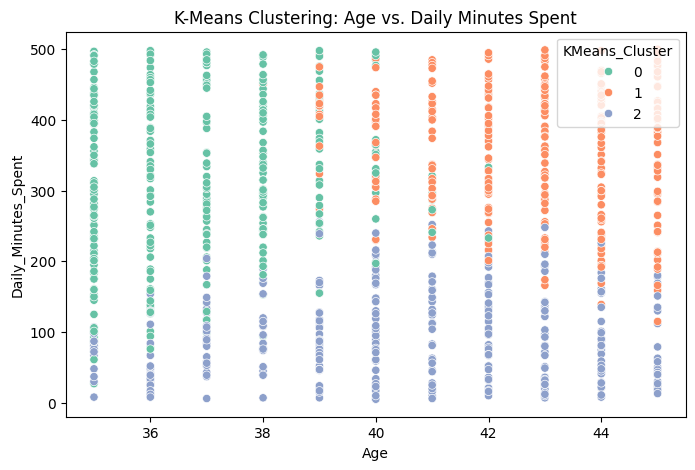

,count
KMeans_Cluster,
2,351
0,336
1,313


In [12]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(scaled_df)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Daily_Minutes_Spent"], hue=df["KMeans_Cluster"], palette="Set2")
plt.title("K-Means Clustering: Age vs. Daily Minutes Spent")
plt.show()

df["KMeans_Cluster"].value_counts()

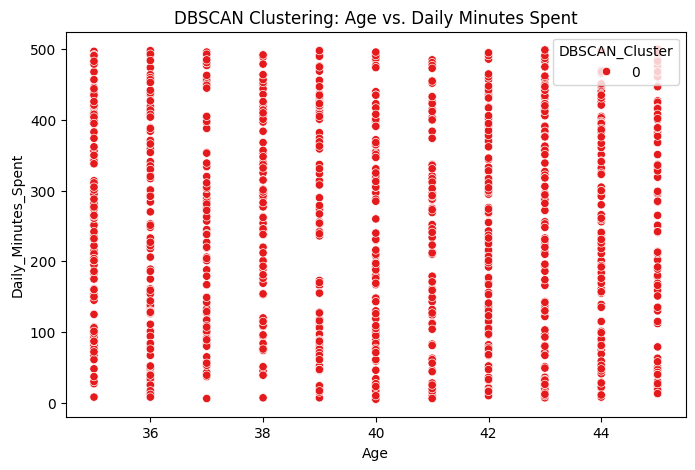

,count
DBSCAN_Cluster,
0,1000


In [13]:
# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=10)
df["DBSCAN_Cluster"] = dbscan.fit_predict(scaled_df)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Daily_Minutes_Spent"], hue=df["DBSCAN_Cluster"], palette="Set1")
plt.title("DBSCAN Clustering: Age vs. Daily Minutes Spent")
plt.show()

df["DBSCAN_Cluster"].value_counts()

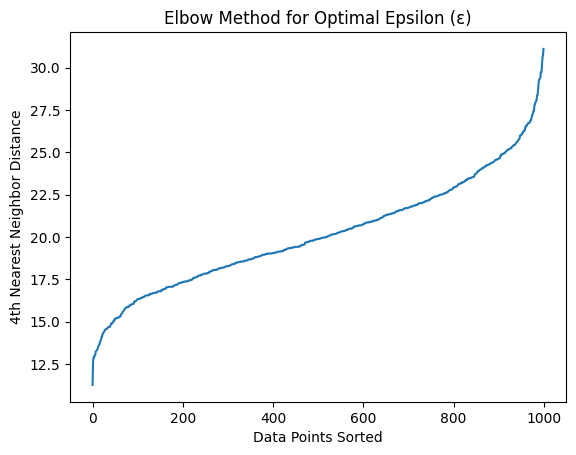

In [19]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

#Selecting numerical features
num_features = df.select_dtypes(include=['float64', 'int64']).columns
X = df[num_features]

#Finding the optimal epsilon (ε) using k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.xlabel("Data Points Sorted")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("Elbow Method for Optimal Epsilon (ε)")
plt.show()


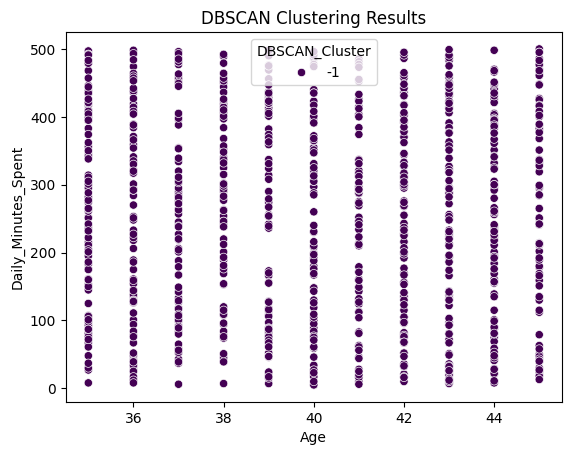

,count
DBSCAN_Cluster,
-1,1000


In [20]:
from sklearn.cluster import DBSCAN
import seaborn as sns

# Define optimal epsilon and min_samples based on the kNN elbow method
optimal_epsilon = 0.5  # Adjust this based on the plot
min_samples = 10  # Standard choice for DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=optimal_epsilon, min_samples=min_samples)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Visualizing the new clusters
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=df['DBSCAN_Cluster'], palette="viridis")
plt.title("DBSCAN Clustering Results")
plt.show()
df["DBSCAN_Cluster"].value_counts()

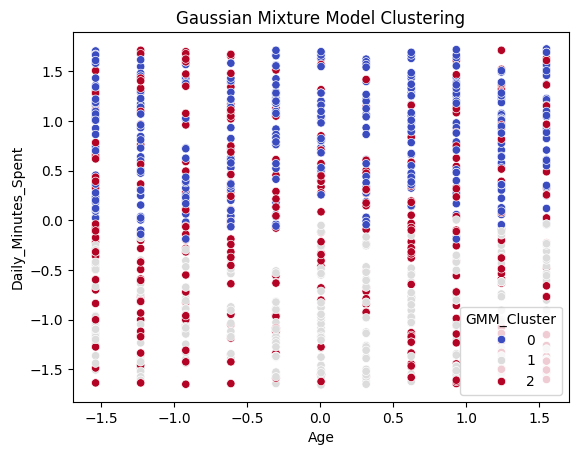

,count
GMM_Cluster,
0,373
2,330
1,297


In [15]:
from sklearn.mixture import GaussianMixture

# Choosing the number of clusters (same as K in K-Means)
n_components = 3

gmm = GaussianMixture(n_components=n_components, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(scaled_df)

sns.scatterplot(x=scaled_df.iloc[:, 0], y=scaled_df.iloc[:, 1], hue=df['GMM_Cluster'], palette="coolwarm")
plt.title("Gaussian Mixture Model Clustering")
plt.show()
df['GMM_Cluster'].value_counts()

In [18]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(scaled_df, df['KMeans_Cluster'])
gmm_silhouette = silhouette_score(scaled_df, df['GMM_Cluster'])

print(f"K-Means: Silhouette Score = {kmeans_silhouette:.2f}")
print(f"GMM: Silhouette Score = {gmm_silhouette:.2f}")

K-Means: Silhouette Score = 0.14
GMM: Silhouette Score = 0.13
